# Convolutional Neural Networks for Image Classification
___

Let's go over example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

### Imports

In [1]:
import numpy as np
import pandas as pd

## Loading CIFAR-10 Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

<img src="CIFAR-10.png" width="500" height="500">

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 42s 0us/step


## Visualizing the Image Data

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
single_image = x_train[0]

In [7]:
single_image

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
single_image.shape

(32, 32, 3)

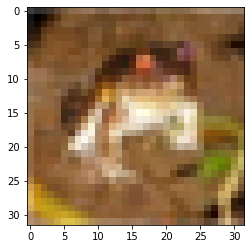

In [10]:
# FROG
plt.imshow(single_image)

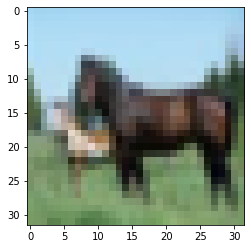

In [11]:
# HORSE
plt.imshow(x_train[12])

## PreProcessing

### Processing X Data

We should normalize the X data

In [12]:
x_train[0].shape

(32, 32, 3)

In [13]:
x_train.max()

255

In [14]:
x_train.min()

0

In [15]:
x_train = x_train/255

In [16]:
x_test.shape

(10000, 32, 32, 3)

In [17]:
x_test.max()

255

In [18]:
x_test.min()

0

In [19]:
x_test = x_test/255

In [20]:
x_train.shape

(50000, 32, 32, 3)

In [21]:
x_test.shape

(10000, 32, 32, 3)

### Labels

In [22]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [23]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Keras has an easy to use function for this:

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
y_train.shape

(50000, 1)

In [27]:
y_train[0]

array([6], dtype=uint8)

In [28]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [29]:
y_cat_train.shape

(50000, 10)

In [30]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [31]:
y_cat_test = to_categorical(y_test)

___

## Building the Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [34]:
32*32*3

3072

In [49]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

# FLATTEN IMAGES FROM 32 by 32 to 3072 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(units=256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy']
             )

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 29, 29, 64)        3136      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        65600     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               409856    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

### Using EarlyStopping to avoid overfitting

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

## Train the Model

In [53]:
model.fit(x=x_train, y=y_cat_train, validation_data=(x_test, y_cat_test), epochs=15, callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 29s 587us/sample - loss: 1.4938 - accuracy: 0.4680 - val_loss: 1.1902 - val_accuracy: 0.5831
Epoch 2/15
50000/50000 [==============================] - 29s 582us/sample - loss: 1.0988 - accuracy: 0.6183 - val_loss: 1.0361 - val_accuracy: 0.6412
Epoch 3/15
50000/50000 [==============================] - 29s 580us/sample - loss: 0.9390 - accuracy: 0.6771 - val_loss: 0.9278 - val_accuracy: 0.6888
Epoch 4/15
50000/50000 [==============================] - 29s 582us/sample - loss: 0.8302 - accuracy: 0.7182 - val_loss: 1.1116 - val_accuracy: 0.6450
Epoch 5/15
50000/50000 [==============================] - 29s 580us/sample - loss: 0.7547 - accuracy: 0.7447 - val_loss: 1.1068 - val_accuracy: 0.6517
Epoch 6/15
50000/50000 [==============================] - 29s 582us/sample - loss: 0.6955 - accuracy: 0.7663 - val_loss: 1.0037 - val_accuracy: 0.7024


In [54]:
# Careful, don't overwrite our file!
model.save('cifar_10epochs.h5')

## Evaluate the Model

#### To see the available metrics

In [55]:
model.metrics_names

['loss', 'accuracy']

In [56]:
losses = pd.DataFrame(model.history.history)

In [57]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.493816,0.46804,1.190177,0.5831
1,1.098798,0.61830,1.036138,0.6412
2,0.939008,0.67708,0.927834,0.6888
3,0.830234,0.71822,1.111563,0.6450
4,0.754671,0.74474,1.106766,0.6517


#### `accuracy` vs `val_accuracy`

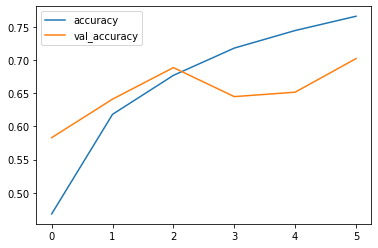

In [58]:
losses[['accuracy', 'val_accuracy']].plot()

#### `loss` vs `val_loss`

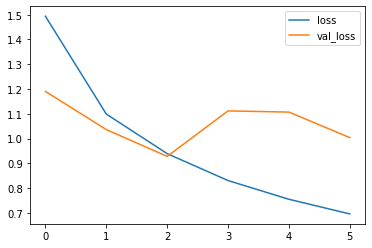

In [59]:
losses[['loss', 'val_loss']].plot()

In [60]:
print(model.metrics_names)
print(model.evaluate(x_test, y_cat_test, verbose=0))

['loss', 'accuracy']
[1.0036915667533874, 0.7024]


## Classification Report and Confusion Matrix

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
predictions = model.predict_classes(x_test)

In [63]:
y_cat_test.shape

(10000, 10)

#### First image data in test data (categorical)

In [65]:
# LABEL = CAT
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### First predicted image

In [66]:
predictions[0]

3

#### First image data in test data

In [67]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

### Classification Report

In [68]:
print(classification_report(y_true=y_test, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72      1000
           1       0.81      0.84      0.82      1000
           2       0.52      0.71      0.60      1000
           3       0.59      0.41      0.48      1000
           4       0.76      0.58      0.66      1000
           5       0.58      0.68      0.62      1000
           6       0.87      0.70      0.77      1000
           7       0.77      0.75      0.76      1000
           8       0.77      0.82      0.80      1000
           9       0.82      0.72      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



### Confusion Matrix

In [69]:
print(confusion_matrix(y_true=y_test, y_pred=predictions))

[[812  18  44   6   5   7   5   7  75  21]
 [ 27 838  12   6   1   3   7   5  39  62]
 [ 73   6 708  37  46  63  18  29  13   7]
 [ 51  14 133 412  43 231  36  37  27  16]
 [ 47   3 146  48 579  64  18  74  18   3]
 [ 24   3  90 102  22 676  11  53  11   8]
 [ 18  10 123  56  29  37 697   8  12  10]
 [ 32   2  64  21  30  73   3 754  10  11]
 [ 89  29  14   6   2  10   2   3 823  22]
 [ 70 114  18  10   2   6   3  12  40 725]]


### Confusion Matrix as HeatMap

In [70]:
import seaborn as sns

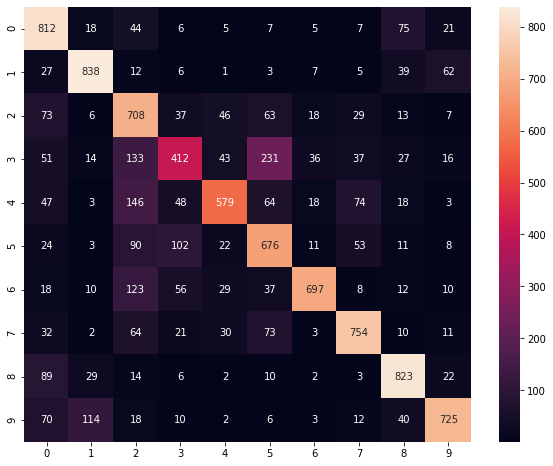

In [74]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=predictions), annot=True, fmt='.3g')

From above diagram we can see that 231 cats has been predicted wrong as dogs since it is difficult to identify when image is blurred in 32 by 32 image

## Predicting a given image

In [75]:
my_image = x_test[16]

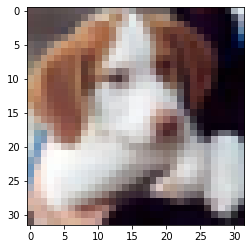

In [76]:
plt.imshow(my_image)

In [77]:
my_image.shape

(32, 32, 3)

In [78]:
# SHAPE --> (num_images, width, height, color_channels)
model.predict_classes(my_image.reshape(1, 32, 32, 3))

array([5])

In [79]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html

___

## Thank You !

___